In [1]:
#load relevant packages

import pandas as pd
import ast
import pysam
from Bio import SeqIO
import glob
import numpy as np
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from histogramplotter import *
import os
from dnds import dnds, pnps
# print(dnds.__file__)

from utils import *
import argparse

In [2]:
# #parser input
# parser = argparse.ArgumentParser()
# parser.add_argument('-i', nargs='+', help='List of mutation_analysis reports')
# #parser.add_argument('-m', help='Path to metadata')
# #parser.add_argument('-r', help='Path to reference database')

# args = parser.parse_args(args=[])
# args = parser.parse_args()

In [3]:
# declare variables as argument inputs
#debugging file load
# cell_sort_pop = 'yJH4s17'
# date_of_interest = '2025-01-06'
# experiment_id = 'jh_009'
# mutation_df_paths = f'../../Data/{date_of_interest}/00_fastq/minibinders_data/minibinders_outputs/{experiment_id}/mutation_dfs/'

###
#editing section

experiment_id = 'jh_020'
fasta_name = 'pmaa23_nbonly'
read_ct = '2'

mutation_df_paths = f'../Mutation_Finder_Miguel_Updated_16JAN/minibinders_data/minibinders_outputs/{experiment_id}/mutation_dfs/'

ref_fasta_path = f'../Mutation_Finder_Miguel_Updated_16JAN/minibinders_data/ngs_raw/{experiment_id}/references/{fasta_name}.fasta'

###

# define parent / wt sequence
ref_fasta = SeqIO.read(ref_fasta_path, "fasta")
parent_dna_seq = ref_fasta.seq
parent_dna_id = ref_fasta.id


# Use glob to create a list of file paths
csv_files = glob.glob(os.path.join(mutation_df_paths, f"*_readct{read_ct}.csv"))
print(csv_files)
# mutation_df_paths = args.i
#metadata_path = args.m 
#ref_dir = args.r

# Set global font size and family
plt.rcParams.update({
    'font.size': 16,
    # 'font.family': 'Arial'
})

['../Mutation_Finder_Miguel_Updated_16JAN/minibinders_data/minibinders_outputs/jh_020/mutation_dfs/1_S76_yJH12s5_mutation_analysis_readct2.csv', '../Mutation_Finder_Miguel_Updated_16JAN/minibinders_data/minibinders_outputs/jh_020/mutation_dfs/2_S77_yJH13s5_mutation_analysis_readct2.csv']


1_S76_yJH12s5
5053 unique sequences (unweighted)
42052 total reads (weighted)
  aa_mutations
0         L11P
1         N28I
2         L45R
3         F67I
4         T68A
5        G101S
6         L11P
7         N28I


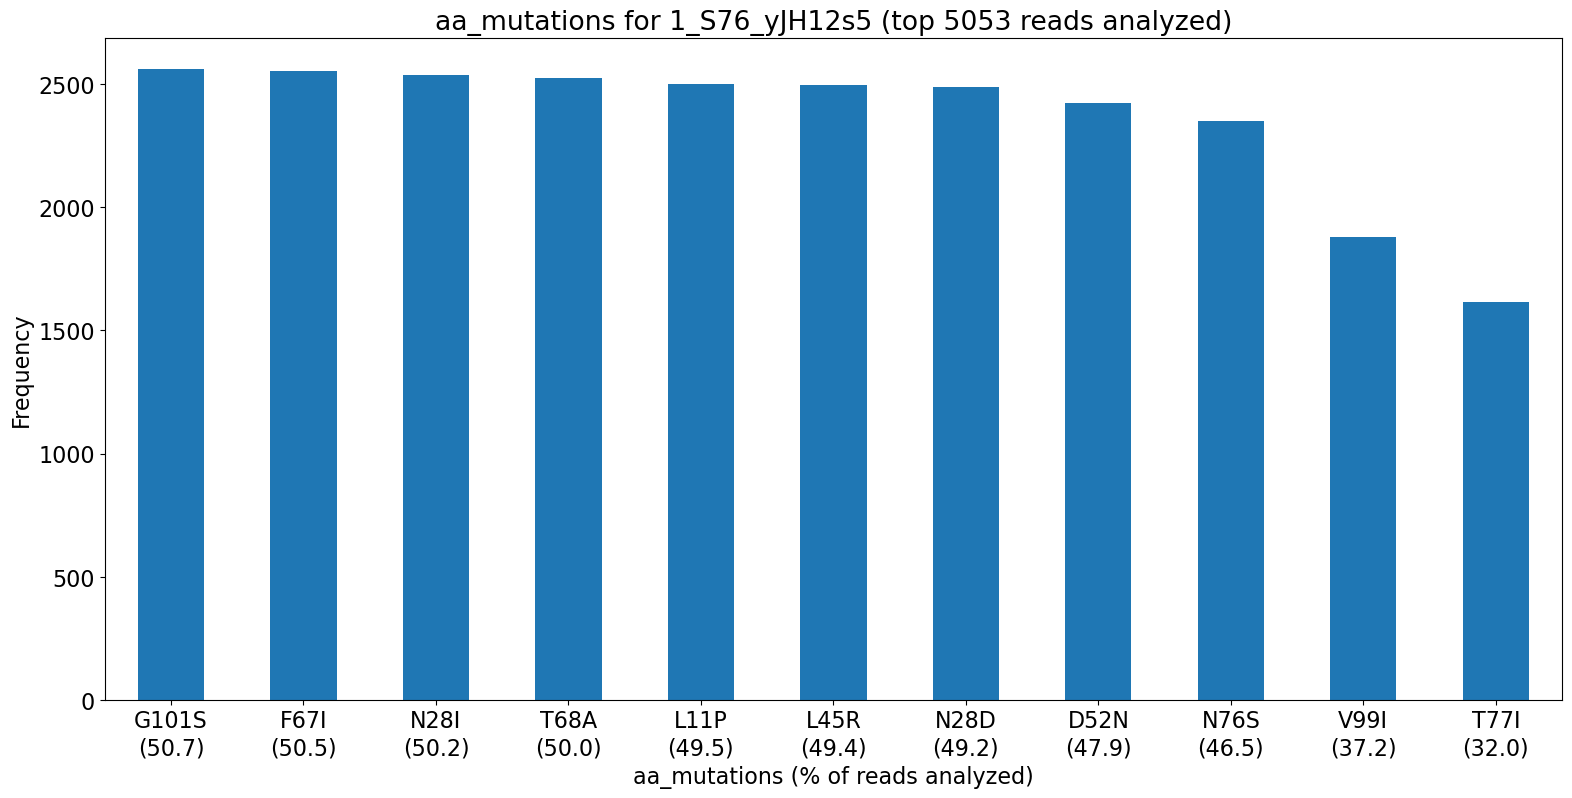

Histogram saved as ../Mutation_Finder_Miguel_Updated_16JAN/minibinders_data/minibinders_outputs/jh_020/mutation_figs/1_S76_yJH12s5/1_S76_yJH12s5_mutation_freq_readct2_9pct.png


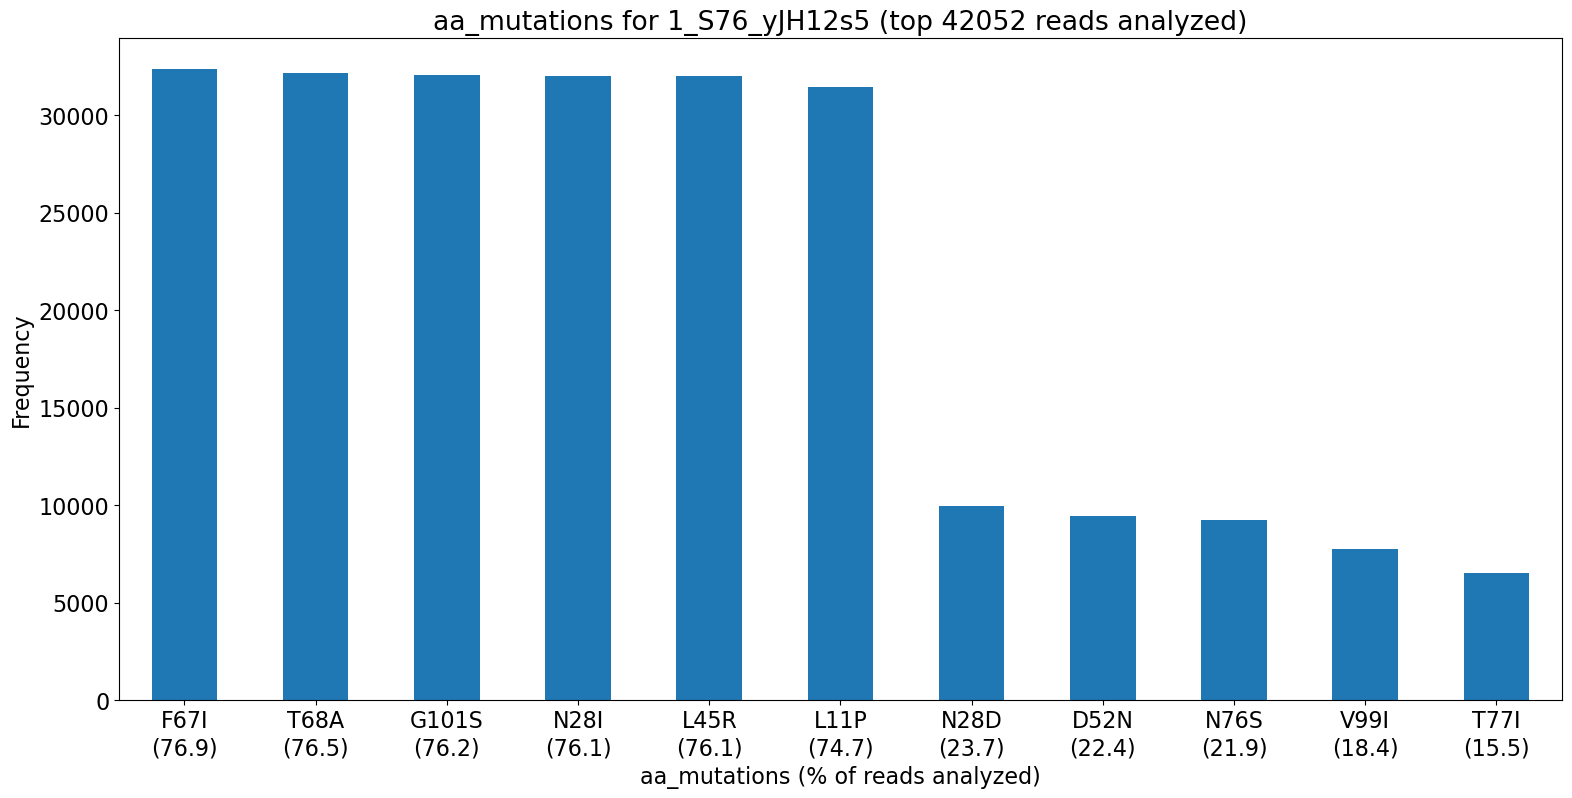

Histogram saved as ../Mutation_Finder_Miguel_Updated_16JAN/minibinders_data/minibinders_outputs/jh_020/mutation_figs/1_S76_yJH12s5/1_S76_yJH12s5_mutation_freq_weighted_readct2_9pct.png
2_S77_yJH13s5
5930 unique sequences (unweighted)
97211 total reads (weighted)
  aa_mutations
0         N28D
1         N28D
2         N28D
3         N28D
4         N28D
5         N28D
6         N28D
7         N28D


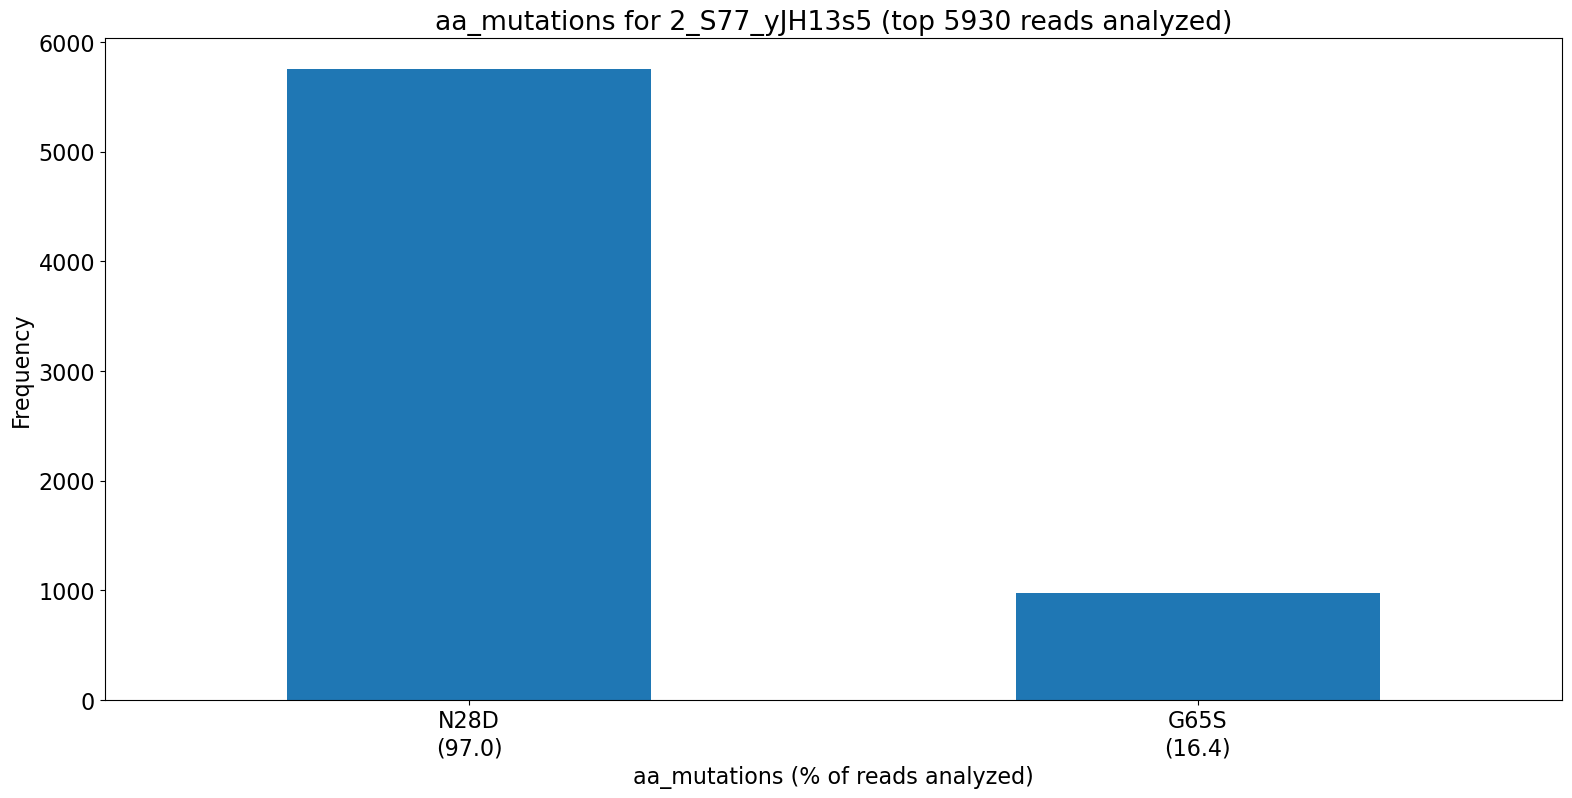

Histogram saved as ../Mutation_Finder_Miguel_Updated_16JAN/minibinders_data/minibinders_outputs/jh_020/mutation_figs/2_S77_yJH13s5/2_S77_yJH13s5_mutation_freq_readct2_9pct.png


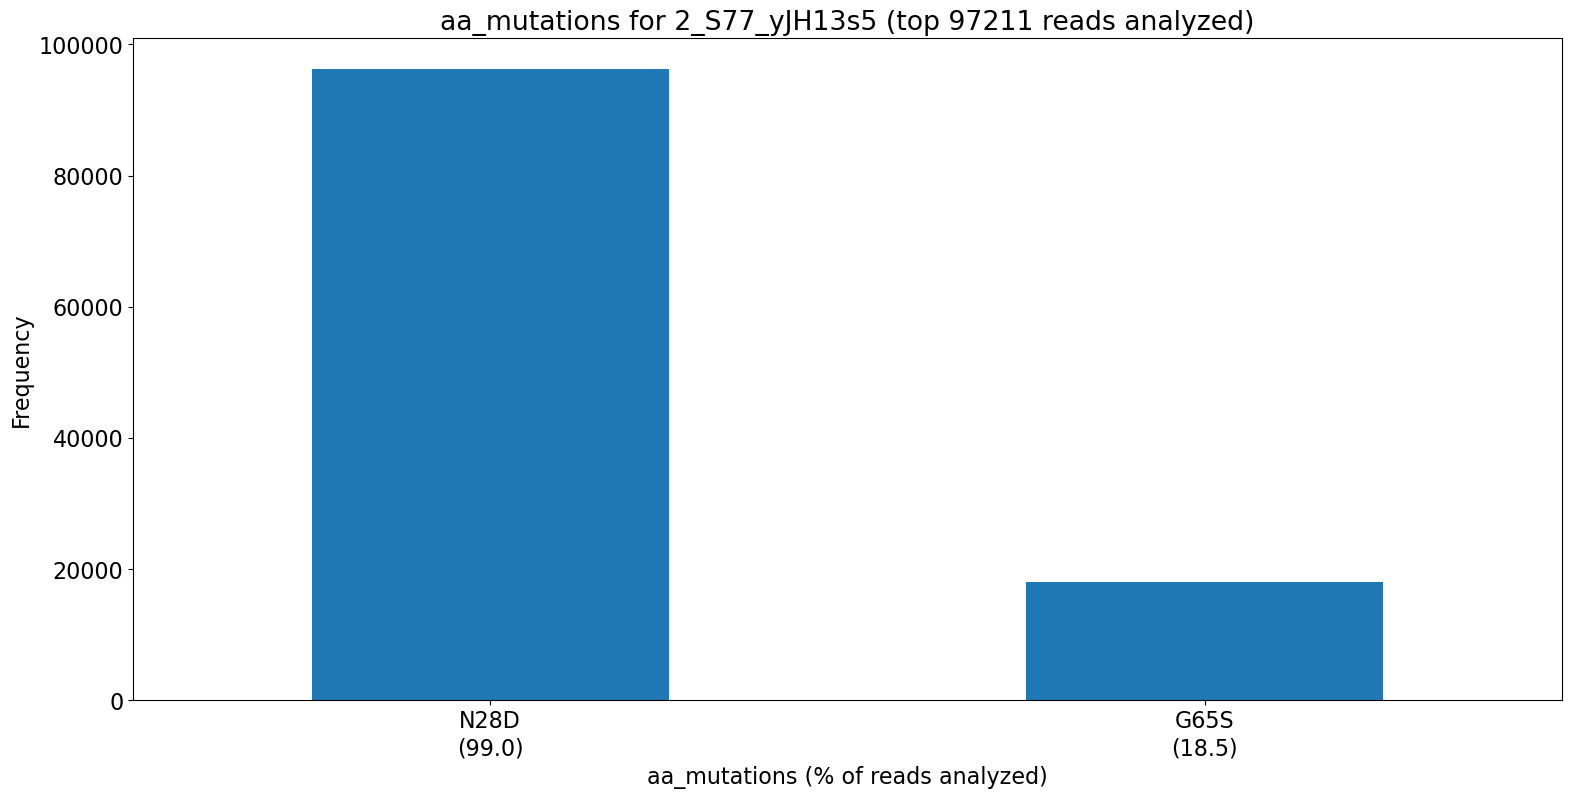

Histogram saved as ../Mutation_Finder_Miguel_Updated_16JAN/minibinders_data/minibinders_outputs/jh_020/mutation_figs/2_S77_yJH13s5/2_S77_yJH13s5_mutation_freq_weighted_readct2_9pct.png


In [4]:
# convert input into dataframe. loop for multiple files
for mutation_path in csv_files:
    mutation_df = pd.read_csv(mutation_path, index_col=0)
    # print(mutation_df)
    sample_name = mutation_path.split('/')[-1].replace(f'_mutation_analysis_readct{read_ct}.csv','')
    print(sample_name)
    outdir = '/'.join(mutation_path.replace('mutation_dfs', 'mutation_figs').split('/')[:-1]) + '/'
    # make_dir(outdir)
    outdir_sample = outdir + sample_name +'/'
    make_dir(outdir_sample)

    outname = outdir_sample + sample_name

    #metadata_samp = metadata_df.copy()[metadata_df['sample_id'].str.contains(sample_name)]
    #reference_name = list(metadata_samp['reference'])[0]

    num_sequences = len(mutation_df)
    print(f"{num_sequences} unique sequences (unweighted)")
    # isolate column of AA mutations only
    aa_mut_df = mutation_df['aa_mutations']
    # print(aa_mut_df[0])
    # print(type(aa_mut_df))
    aa_mut_df = aa_mut_df.apply(ast.literal_eval)
    # print(aa_mut_df[:5])
    aa_mut_flat = [item for sublist in aa_mut_df for item in sublist]
    # print(aa_mut_flat[:10])
    total_aa_muts = len(aa_mut_flat)
    # print(total_aa_muts)
    aa_mut_flat_df = pd.DataFrame(aa_mut_flat, columns = ['aa_mutations'])
    # print(aa_mut_flat_df[:6])
    # print(type(aa_mut_flat_df))


    
    # mutations weighted by read count
    # aa_mut_df_weights = mutation_df[['read_count','aa_mutations']].copy()
    # # print(type(aa_mut_df_weights))
    num_weighted_reads = mutation_df['read_count'].sum()
    print(f"{num_weighted_reads} total reads (weighted)")

    
    aa_mut_weights_explode_df = pd.DataFrame(mutation_df['aa_mutations'].repeat(mutation_df['read_count']))
    # print(aa_mut_weights_explode_df[:8])
    aa_mut_weights_explode = aa_mut_weights_explode_df['aa_mutations'].reset_index(drop=True)
    # print(aa_mut_weights_explode[:9])
    # print(aa_mut_weights_explode[1000:1010])

    # aa_mut_weights_explode_ser = aa_mut_weights_explode.squeeze()

    aa_mut_weights_explode = aa_mut_weights_explode.apply(ast.literal_eval)
    # print(aa_mut_weights_explode[:10])
    aa_mut_weight_flat = [item2 for sublist2 in aa_mut_weights_explode for item2 in sublist2]
    # print(aa_mut_weight_flat[:14])
    # print(aa_mut_weight_flat[1000:1009])
    aa_mut_weight_flat_df = pd.DataFrame(aa_mut_weight_flat, columns = ['aa_mutations'])
    print(aa_mut_weight_flat_df[:8])



   
    csv_outputaa_path = f'../Mutation_Finder_Miguel_Updated_16JAN/minibinders_data/minibinders_outputs/{experiment_id}/mutation_dfs/{sample_name}_mutation_readct{read_ct}_aaseq.csv'
    mutation_df.index = ['k' + str(idx) for idx in mutation_df.index]
    mutation_df['aa_sequence'].to_csv(csv_outputaa_path)

    aa_seq_weights_explode_df = pd.DataFrame(mutation_df['aa_sequence'].repeat(mutation_df['read_count']))

    csv_weighted_outputaa_path = f'../Mutation_Finder_Miguel_Updated_16JAN/minibinders_data/minibinders_outputs/{experiment_id}/mutation_dfs/{sample_name}_mutation_readct{read_ct}_weighted_aaseq.csv'
    aa_seq_weights_explode_df.index = ['w' + str(idx) for idx in aa_seq_weights_explode_df.index]
    aa_seq_weights_explode_df.to_csv(csv_weighted_outputaa_path)

    csv_outputdna_path = f'../Mutation_Finder_Miguel_Updated_16JAN/minibinders_data/minibinders_outputs/{experiment_id}/mutation_dfs/{sample_name}_mutation_readct{read_ct}_dnaseq.csv'
    # mutation_df.index = ['j' + str(idx) for idx in mutation_df.index]
    mutation_df['dna_sequence'].to_csv(csv_outputdna_path)

    dna_seq_weights_explode_df = pd.DataFrame(mutation_df['dna_sequence'].repeat(mutation_df['read_count']))

    csv_weighted_outputdna_path = f'../Mutation_Finder_Miguel_Updated_16JAN/minibinders_data/minibinders_outputs/{experiment_id}/mutation_dfs/{sample_name}_mutation_readct{read_ct}_weighted_dnaseq.csv'
    dna_seq_weights_explode_df.index = ['x' + str(idx) for idx in dna_seq_weights_explode_df.index]
    dna_seq_weights_explode_df.to_csv(csv_weighted_outputdna_path)

    pct_cut = 9
    output_path = f'../Mutation_Finder_Miguel_Updated_16JAN/minibinders_data/minibinders_outputs/{experiment_id}/mutation_figs/{sample_name}/{sample_name}_mutation_freq_readct{read_ct}_{pct_cut}pct.png'
    output_path_weighted = f'../Mutation_Finder_Miguel_Updated_16JAN/minibinders_data/minibinders_outputs/{experiment_id}/mutation_figs/{sample_name}/{sample_name}_mutation_freq_weighted_readct{read_ct}_{pct_cut}pct.png'
    freq_cutoff = (num_sequences*(pct_cut/100))
    freq_cutoff_weighted = (num_weighted_reads*(pct_cut/100))
    char_hist_unweighted = character_bars(aa_mut_flat_df, output_path, freq_cutoff, sample_name, num_sequences)
    char_hist_weighted = character_bars(aa_mut_weight_flat_df, output_path_weighted, freq_cutoff_weighted, sample_name, num_weighted_reads)

1_S76_yJH12s5 has 0 wild type reads
expected synonymous mutations: 262, expected nonsynonymous mutations: 818
expected dN/dS for 1_S76_yJH12s5 is : 3.12
synonymous mutations: 88179, nonsynonymous mutations: 168786
dN/dS = 1.91 for 1_S76_yJH12s5, normalized as 0.61
1_S76_yJH12s5 is experiencing purifying selection
1_S76_yJH12s5 has 8 reads with no synonymous mutations
1_S76_yJH12s5 has 5043 sequences with valid dN/dS values


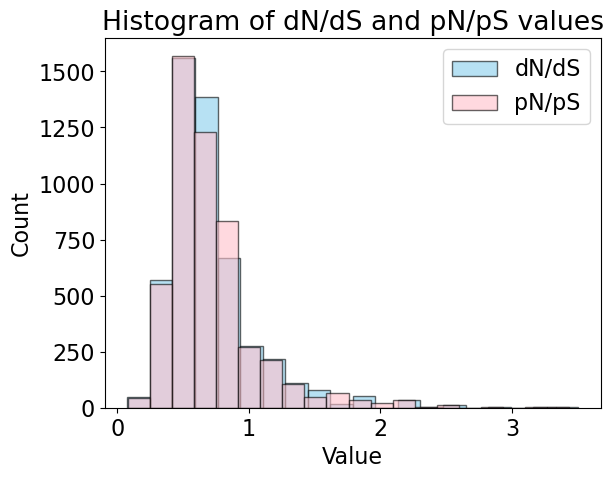

-------new sample--------
2_S77_yJH13s5 has 92 wild type reads
expected synonymous mutations: 262, expected nonsynonymous mutations: 818
expected dN/dS for 2_S77_yJH13s5 is : 3.12
synonymous mutations: 10258, nonsynonymous mutations: 83891
dN/dS = 8.18 for 2_S77_yJH13s5, normalized as 2.62
2_S77_yJH13s5 is experiencing positive selection
2_S77_yJH13s5 has 3106 reads with no synonymous mutations
2_S77_yJH13s5 has 2822 sequences with valid dN/dS values


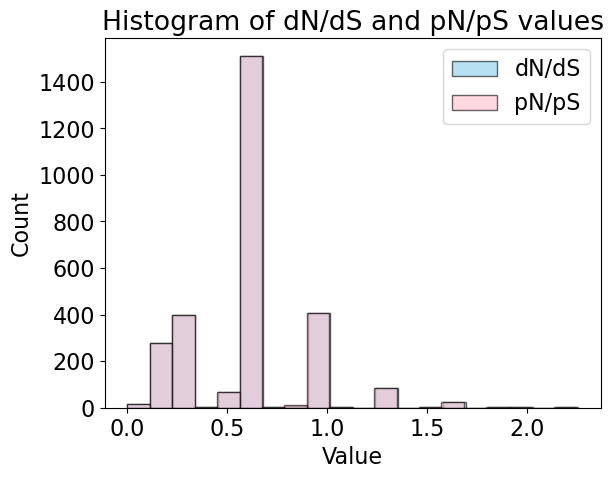

-------new sample--------


In [8]:
# calculate number of reads that are WT or parent
for mutation_path in csv_files:
    mutation_df = pd.read_csv(mutation_path, index_col=0)
    sample_name = mutation_path.split('/')[-1].replace(f'_mutation_analysis_readct{read_ct}.csv','')

    #sum WT read counts
    sum_wt_reads = mutation_df[mutation_df['aa_mutations'] == '[]']['read_count'].sum()
    print(f'{sample_name} has {sum_wt_reads} wild type reads')

    #this section of the code will compare DNA mutations and AA mutations and calculate dN/dS

    dna_sequences =  mutation_df['dna_sequence']
    dna_mut_df = mutation_df['dna_mutations']
    aa_sequences = mutation_df['aa_sequence']
    aa_mut_df = mutation_df['aa_mutations']
    read_counts = mutation_df['read_count']
    aa_mut_df = aa_mut_df.apply(ast.literal_eval)

    syn_ex = 0
    nonsyn_ex = 0
    segment = 1

    for j in range(0, int(len(parent_dna_seq)/segment), 3):
        # print(range(0, int(len(parent_dna_seq)), 3))
        codon_ex = parent_dna_seq[j:j+3]
        aa_ex = translate_sequence(codon_ex)
        # print(f"{codon_ex}, {aa_ex}")

        for pos_ex in range(len(codon_ex)):
            for base in 'ATCG':
                if base != codon_ex[pos_ex]:
                    mut_codon_ex = codon_ex[:pos_ex] + base + codon_ex[pos_ex+1:]
                    mut_aa_ex = translate_sequence(mut_codon_ex)
                    # print(f"{mut_codon_ex}, {mut_aa_ex}")
                    # print(aa_ex,mut_aa_ex)
                    if mut_aa_ex == aa_ex:
                        syn_ex += 1
                        # print(f"synonymous, {syn_ex}")
                    else:
                        nonsyn_ex += 1
                        # print(f"non-synonymous, {nonsyn_ex}")

    ratio_ex = nonsyn_ex/syn_ex if nonsyn_ex>0 else float('inf')
    print(f"expected synonymous mutations: {syn_ex}, expected nonsynonymous mutations: {nonsyn_ex}")
    print(f"expected dN/dS for {sample_name} is : {ratio_ex:.2f}")
    

    
    syn = 0
    nonsyn = 0
    no_ds_ct = 0
    dnds_per_seq = []
    pnps_per_seq = []
    
    for i in range(1, int(len(mutation_df[:-1]))):
        dna_seq = dna_sequences.iloc[i]
        dna_seq_muts = dna_mut_df.iloc[i]
        seq_reads = read_counts.iloc[i]
        try:
            dnds_test = round(dnds(dna_seq, parent_dna_seq), 3)
            dnds_per_seq.append(dnds_test)

            pnps_test = round(float(pnps(dna_seq, parent_dna_seq)), 3)
            pnps_per_seq.append(pnps_test)
            # print(i, dnds_test)
        except Exception as e2:
            # print(f"Error for sequence {i}: {e2}")
            no_ds_ct += 1
        # print(seq_reads)
        # dna_mut_df = dna_mut_df.apply(ast.literal_eval)
        dna_seq_muts = dna_seq_muts.strip('[]').strip("'").strip('"')
        dna_seq_muts = [item.strip().strip("'").strip('"') for item in dna_seq_muts.split(',')]
        # print(dna_seq_muts)
        aa_seq_muts = aa_mut_df.iloc[i]
        # aa_seq_muts = aa_seq_muts.strip('[]').strip("'").strip('"')
        # aa_seq_muts = [item.strip().strip("'").strip('"') for item in aa_seq_muts.split(',')]
        # print(aa_seq_muts)
        for dmut in dna_seq_muts[:-1]:
            # print(dmut)
            position = int(dmut[1:-1])
            mut_base = dmut[-1]
            codon_start = (position // 3) * 3
            codon_pos_in_trip = position % 3
            # print(f"{position},{codon_start},{codon_pos_in_trip}")
            ref_codon = parent_dna_seq[codon_start:codon_start+3]
            # print(ref_codon)
            mut_codon = list(ref_codon)
            mut_codon[codon_pos_in_trip]= mut_base
            mut_codon= ''.join(mut_codon)
            # print(mut_codon)

            #translate and compare
            try:
                ref_aa = str(translate_sequence(ref_codon))
                mut_aa = str(translate_sequence(mut_codon))

                if ref_aa == mut_aa:
                    syn += 1*seq_reads
                else:
                    nonsyn += 1*seq_reads

            except Exception as e:
                print(f"Error translating codon at position {pos}: {e}")
    
    print(f"synonymous mutations: {syn}, nonsynonymous mutations: {nonsyn}")

    ratio = nonsyn/syn if syn>0 else float('inf')
    print(f"dN/dS = {ratio:.2f} for {sample_name}, normalized as {ratio/ratio_ex:.2f}")

    if ratio/ratio_ex < 1:
        print(f"{sample_name} is experiencing purifying selection")
    else:
        print(f"{sample_name} is experiencing positive selection")

    print(f"{sample_name} has {no_ds_ct} reads with no synonymous mutations")
    print(f"{sample_name} has {len(dnds_per_seq)} sequences with valid dN/dS values")

    dnds_hist = plt.hist(dnds_per_seq, bins=20, alpha=0.6, label='dN/dS', color='skyblue', edgecolor='black')
    plt.hist(pnps_per_seq, bins=20, alpha=0.6, label='pN/pS', color='pink', edgecolor='black')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.title('Histogram of dN/dS and pN/pS values')
    plt.legend()
    plt.show()
    
    print("-------new sample--------")
            